In [1]:
# import library
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# set default directory
os.chdir('/home/lbertel/code/talento_tech/content')

# set style matplotlib
plt.style.use('tableau-colorblind10')

# load data
colombia_df = pd.read_csv('data/processed/colombia_data.csv')
colombia_df.head(10)

,YEAR,MONTH,PRODUCT,VALUE
0,2014,1,Hydro,3903.977
1,2014,1,Wind,5.648
2,2014,1,Solar,1.065
3,2014,1,Coal,521.938
4,2014,1,Oil,139.219
5,2014,1,Natural gas,1031.146
6,2014,1,Combustible renewables,99.721
7,2014,1,Net electricity production,5702.714
8,2014,1,Electricity supplied,5555.847
9,2014,1,Distribution losses,536.164


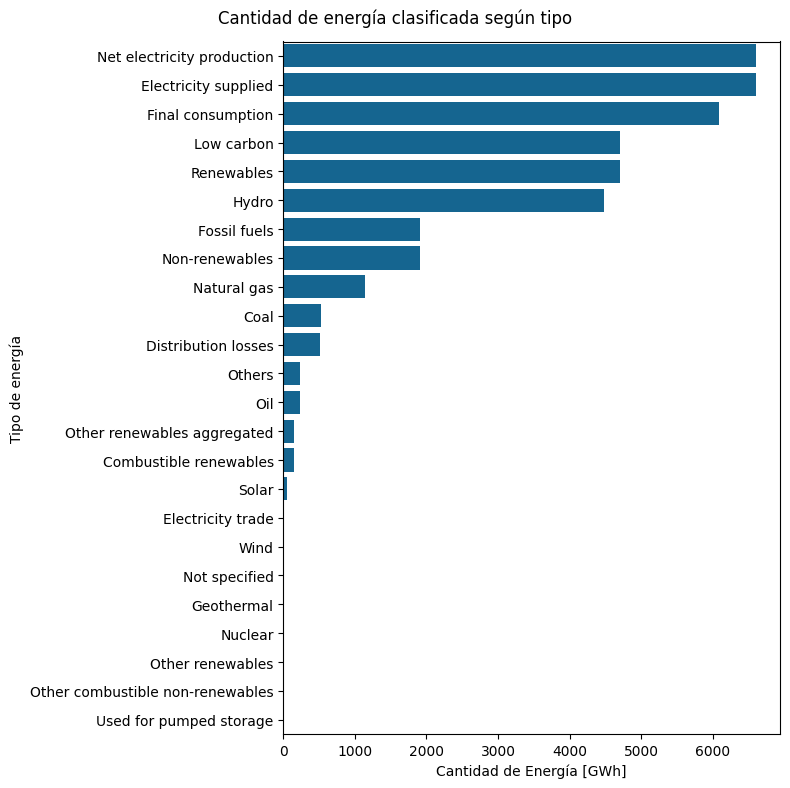

In [6]:
# energy clasification dataset
order = colombia_df.groupby('PRODUCT').mean()['VALUE'].sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('Cantidad de energía clasificada según tipo')

sns.barplot(data=colombia_df, x='VALUE', y='PRODUCT', ax=ax, estimator='mean', errorbar=None, order=order)
ax.set_xlabel('Cantidad de Energía [GWh]')
ax.set_ylabel('Tipo de energía')

plt.tight_layout()
plt.savefig("fig_3.eps")

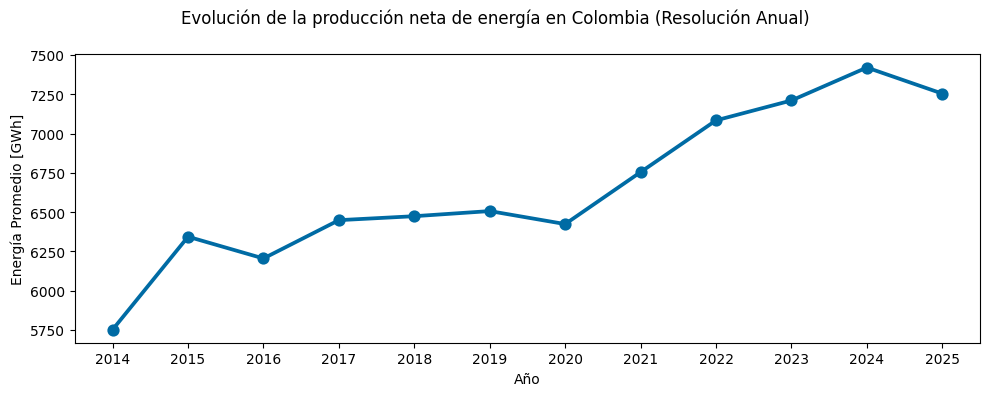

In [7]:
# energy production 2014-2025
filt = (colombia_df['PRODUCT'] == 'Net electricity production')
df_net = colombia_df.loc[filt]
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Evolución de la producción neta de energía en Colombia (Resolución Anual)')

sns.pointplot(data=df_net, x='YEAR', y='VALUE', ax=ax, estimator='mean', errorbar=None)
ax.set_xlabel('Año')
ax.set_ylabel('Energía Promedio [GWh]')

plt.tight_layout()
plt.savefig("fig_4.eps")

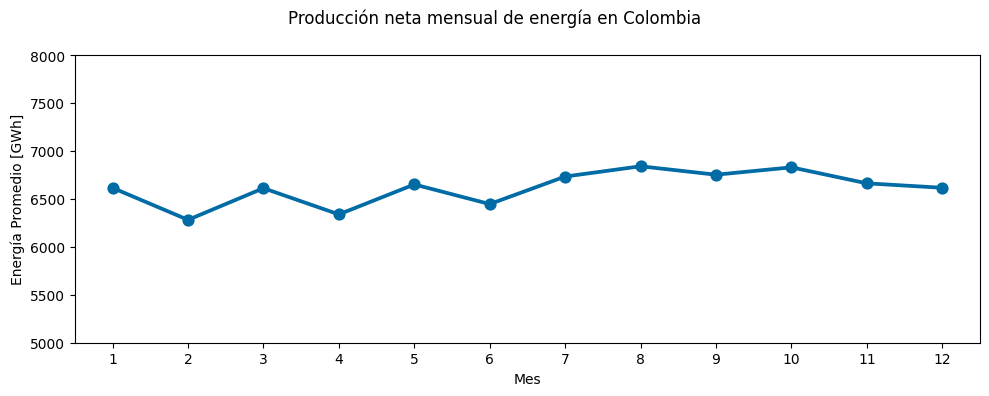

In [8]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Producción neta mensual de energía en Colombia')

sns.pointplot(data=df_net, x='MONTH', y='VALUE', ax=ax, estimator='mean', errorbar=None)
ax.set_xlabel('Mes')
ax.set_ylabel('Energía Promedio [GWh]')
ax.set_ylim([5000, 8000])

plt.tight_layout()
plt.savefig("fig_5.eps")

In [9]:
filt = ['Wind', 'Solar', 'Other renew. agg.', 'Others', 'Nuclear', 'Natural gas', 'Hydro', 'Coal']
df_gen = colombia_df[colombia_df['PRODUCT'].isin(filt)]
df_gen.head()

,YEAR,MONTH,PRODUCT,VALUE
0,2014,1,Hydro,3903.977
1,2014,1,Wind,5.648
2,2014,1,Solar,1.065
3,2014,1,Coal,521.938
5,2014,1,Natural gas,1031.146


In [11]:
matrix = df_gen.groupby('PRODUCT').sum()['VALUE'].sort_values(ascending=False)
matrix

PRODUCT
Hydro          601415.683695
Natural gas    153592.481385
Coal            71158.873666
Others          31527.442435
Solar            7138.600132
Wind              629.372654
Nuclear             0.000000
Name: VALUE, dtype: float64

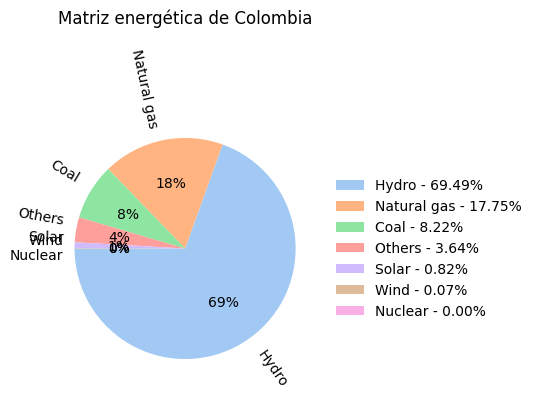

In [12]:
labels = matrix.index

fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Matriz energética de Colombia')

ax.pie(x=matrix, labels=labels, autopct='%.0f%%', rotatelabels=True,startangle=180, colors=sns.color_palette("pastel"));
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["{} - {:.2f}%".format(i,j/sum(matrix)*100) for i,j in zip(labels,matrix)], frameon=False)

plt.tight_layout()
plt.savefig("fig_6.eps")

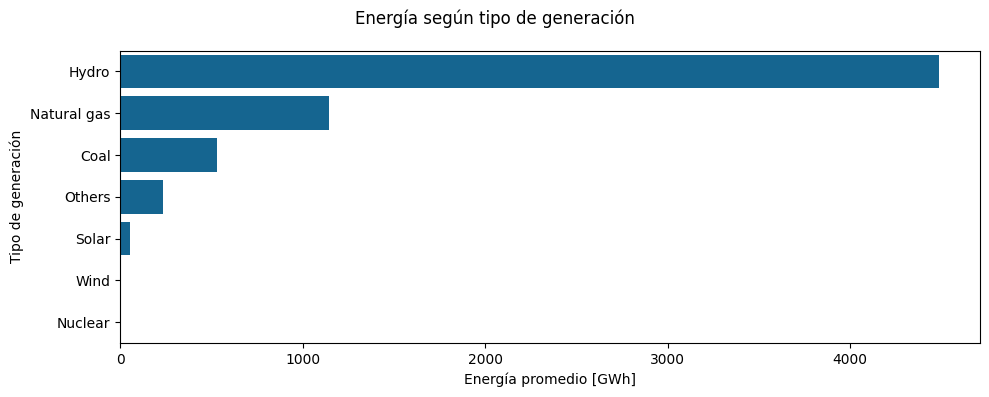

In [15]:
order = df_gen.groupby('PRODUCT').mean()['VALUE'].sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Energía según tipo de generación')

sns.barplot(data=df_gen, x='VALUE', y='PRODUCT', ax=ax, estimator='mean', errorbar=None, order=order)
ax.set_xlabel('Energía promedio [GWh]')
ax.set_ylabel('Tipo de generación')

plt.tight_layout()
plt.savefig("fig_7.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


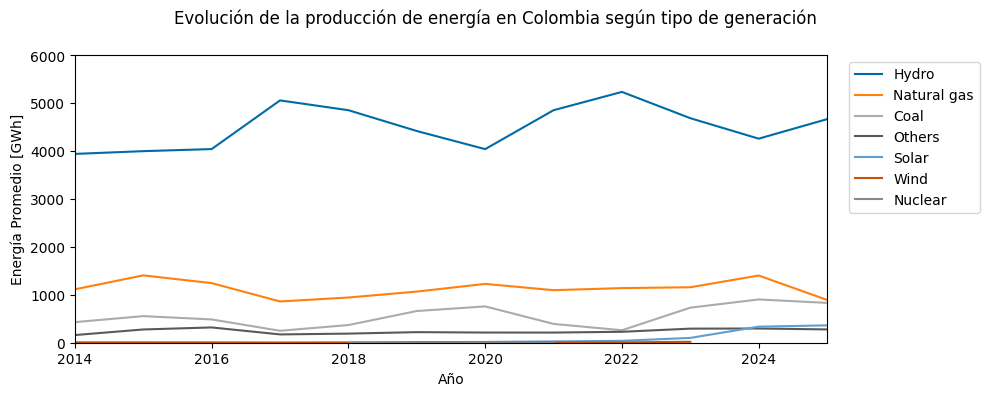

In [16]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Evolución de la producción de energía en Colombia según tipo de generación')

sns.lineplot(data=df_gen, x='YEAR', y='VALUE', ax=ax, hue='PRODUCT', estimator='mean', errorbar=None, hue_order=order,)
ax.set_xlabel('Año')
ax.set_ylabel('Energía Promedio [GWh]')
ax.set_xlim([2014, 2025])
ax.set_ylim([0, 6000])
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.savefig("fig_8.eps")

In [18]:
df_gen_year = df_gen.groupby(['YEAR','PRODUCT']).mean()
df_gen_year.sort_values(['YEAR', 'VALUE'], ascending=[True, False], inplace=True)
df_gen_year.head(14)

MONTH        VALUE
YEAR PRODUCT                        
2014 Hydro          6.5  3937.424333
     Natural gas    6.5  1113.783417
     Coal           6.5   429.340833
     Others         6.5   159.849250
     Wind           6.5     5.790167
     Solar          6.5     0.745583
2015 Hydro          6.5  3994.836750
     Natural gas    6.5  1404.155417
     Coal           6.5   554.467500
     Others         6.5   276.451667
     Wind           6.5     5.624750
     Solar          6.5     0.745583
2016 Hydro          6.5  4038.266250
     Natural gas    6.5  1243.133167

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


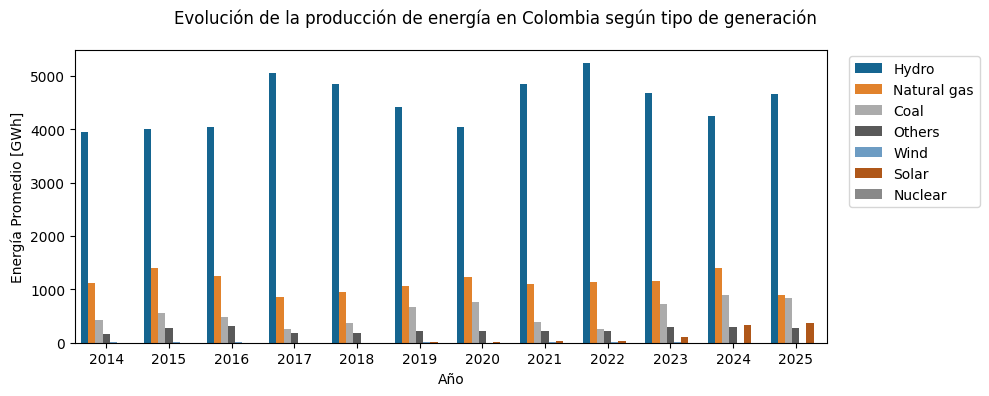

In [19]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Evolución de la producción de energía en Colombia según tipo de generación')

sns.barplot(data=df_gen_year.reset_index(), x='YEAR', y='VALUE', hue='PRODUCT')
ax.set_xlabel('Año')
ax.set_ylabel('Energía Promedio [GWh]')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.savefig("fig_9.eps")

In [22]:
filt = ['Non-renewables', 'Renewables']
df_nr = colombia_df[colombia_df['PRODUCT'].isin(filt)]
df_nr.head()

,YEAR,MONTH,PRODUCT,VALUE
12,2014,1,Renewables,4010.411
13,2014,1,Non-renewables,1692.303
30,2014,2,Renewables,3703.603
31,2014,2,Non-renewables,1661.258
48,2014,3,Renewables,4313.454


In [23]:
suma = df_nr.groupby('PRODUCT').sum()['VALUE'].sort_values(ascending=False)
suma

PRODUCT
Renewables        629704.771240
Non-renewables    256278.797486
Name: VALUE, dtype: float64

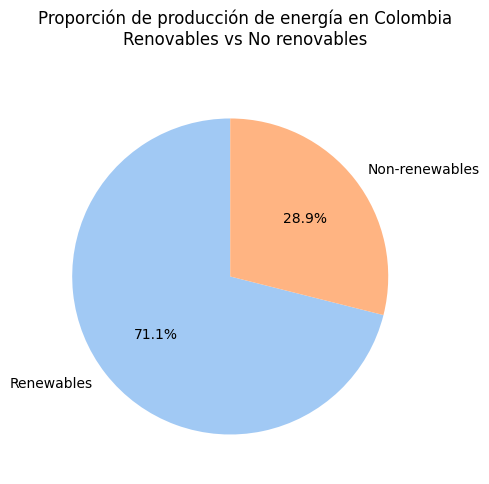

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.suptitle('Proporción de producción de energía en Colombia\nRenovables vs No renovables')

ax.pie(x=suma, labels=suma.index, autopct='%.1f%%', startangle=90, colors=sns.color_palette("pastel"))

plt.tight_layout()
plt.savefig("fig_10.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


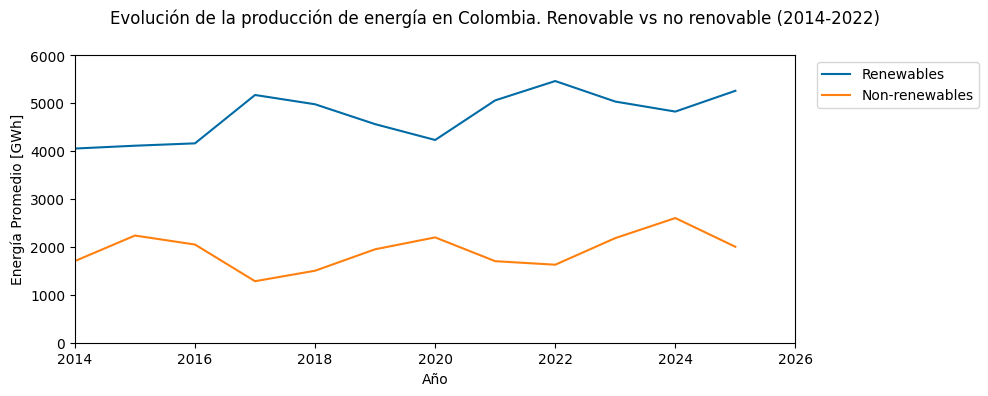

In [25]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Evolución de la producción de energía en Colombia. Renovable vs no renovable (2014-2022)')

sns.lineplot(data=df_nr, x='YEAR', y='VALUE', ax=ax, hue='PRODUCT', estimator='mean', errorbar=None)
ax.set_xlabel('Año')
ax.set_ylabel('Energía Promedio [GWh]')
ax.set_xlim(2014, 2026)
ax.set_ylim([0, 6000])
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.savefig("fig_11.eps")

In [26]:
filt = ['Wind', 'Solar', 'Other renewables', 'Hydro', 'Geothermal', 'Combustible renewables']
df_ren = colombia_df[colombia_df['PRODUCT'].isin(filt)]
df_ren.head()

,YEAR,MONTH,PRODUCT,VALUE
0,2014,1,Hydro,3903.977
1,2014,1,Wind,5.648
2,2014,1,Solar,1.065
6,2014,1,Combustible renewables,99.721
18,2014,2,Hydro,3598.260


In [27]:
suma = df_ren.groupby('PRODUCT').sum()['VALUE'].sort_values(ascending=False)
suma

PRODUCT
Hydro                     601415.683695
Combustible renewables     20521.114759
Solar                       7138.600132
Wind                         629.372654
Geothermal                     0.000000
Other renewables               0.000000
Name: VALUE, dtype: float64

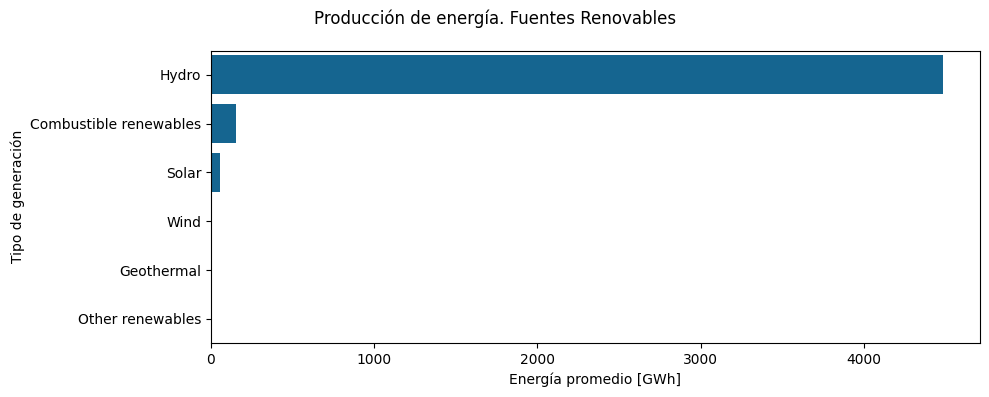

In [30]:
order = df_ren.groupby('PRODUCT').mean()['VALUE'].sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Producción de energía. Fuentes Renovables')

sns.barplot(data=df_ren, x='VALUE', y='PRODUCT', ax=ax, estimator='mean', errorbar=None, order=order)
ax.set_xlabel('Energía promedio [GWh]')
ax.set_ylabel('Tipo de generación')

plt.tight_layout()
plt.savefig("fig_12.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


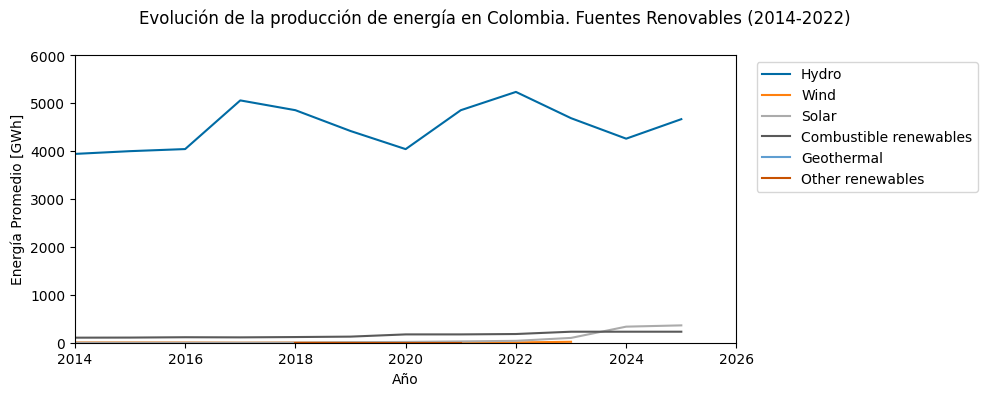

In [31]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Evolución de la producción de energía en Colombia. Fuentes Renovables (2014-2022)')

sns.lineplot(data=df_ren, x='YEAR', y='VALUE', ax=ax, hue='PRODUCT', estimator='mean', errorbar=None)
ax.set_xlabel('Año')
ax.set_ylabel('Energía Promedio [GWh]')
ax.set_xlim(2014, 2026)
ax.set_ylim([0, 6000])
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.savefig("fig_13.eps")

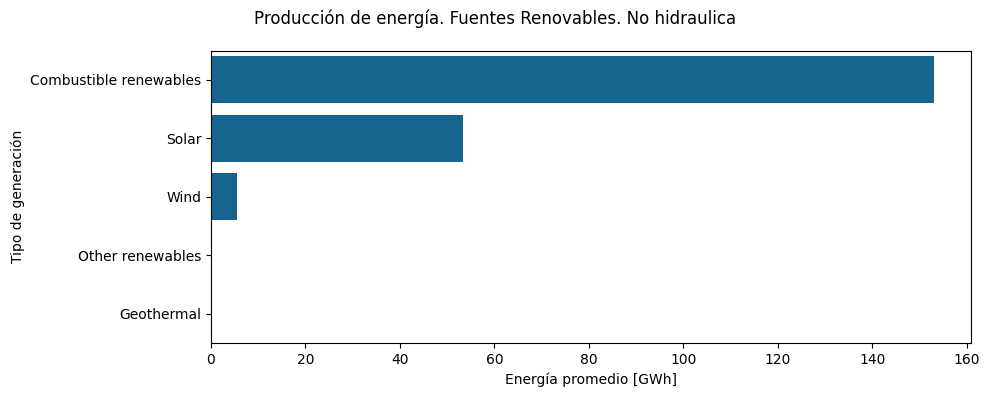

In [32]:
order = df_ren[df_ren["PRODUCT"] != "Hydro"].groupby('PRODUCT').mean()['VALUE'].sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Producción de energía. Fuentes Renovables. No hidraulica')

sns.barplot(data=df_ren[df_ren["PRODUCT"] != "Hydro"], x='VALUE', y='PRODUCT', ax=ax, estimator='mean', errorbar=None, order=order)
ax.set_xlabel('Energía promedio [GWh]')
ax.set_ylabel('Tipo de generación')

plt.tight_layout()
plt.savefig("fig_14.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


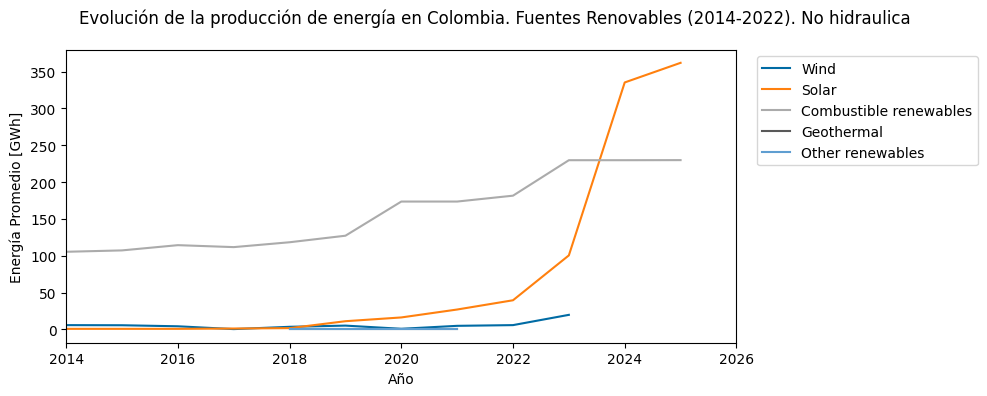

In [33]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Evolución de la producción de energía en Colombia. Fuentes Renovables (2014-2022). No hidraulica')

sns.lineplot(data=df_ren[df_ren["PRODUCT"] != "Hydro"], x='YEAR', y='VALUE', ax=ax, hue='PRODUCT', estimator='mean', errorbar=None)
ax.set_xlabel('Año')
ax.set_ylabel('Energía Promedio [GWh]')
ax.set_xlim(2014, 2026)
# ax.set_ylim([0, 6000])
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.savefig("fig_15.eps")

In [34]:
filt = ['Coal', 'Natural gas', 'Fossil fuels', 'Nuclear']
df_notren = colombia_df[colombia_df['PRODUCT'].isin(filt)]
df_notren.head()

,YEAR,MONTH,PRODUCT,VALUE
3,2014,1,Coal,521.938
5,2014,1,Natural gas,1031.146
17,2014,1,Fossil fuels,1692.303
21,2014,2,Coal,413.943
23,2014,2,Natural gas,1095.052


In [35]:
suma = df_notren.groupby('PRODUCT').sum()['VALUE'].sort_values(ascending=False)
suma

PRODUCT
Fossil fuels    256278.797486
Natural gas     153592.481385
Coal             71158.873666
Nuclear              0.000000
Name: VALUE, dtype: float64

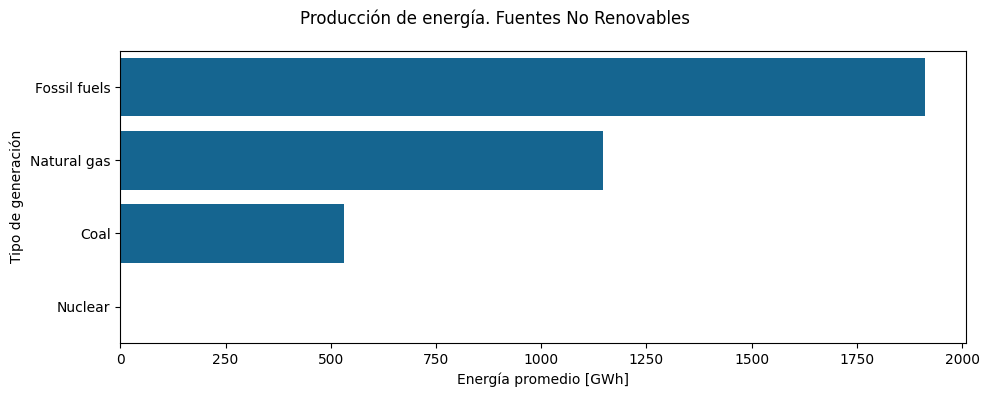

In [36]:
order = df_notren.groupby('PRODUCT').mean()['VALUE'].sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Producción de energía. Fuentes No Renovables')

sns.barplot(data=df_notren, x='VALUE', y='PRODUCT', ax=ax, estimator='mean', errorbar=None, order=order)
ax.set_xlabel('Energía promedio [GWh]')
ax.set_ylabel('Tipo de generación')

plt.tight_layout()
plt.savefig("fig_16.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


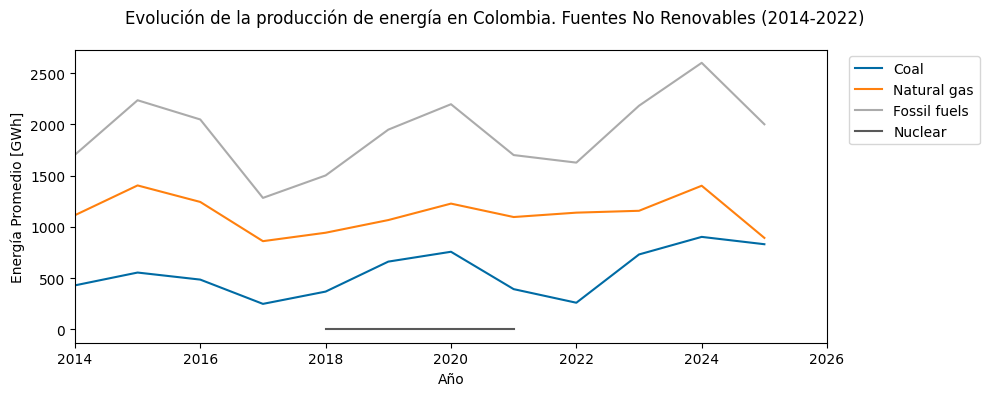

In [37]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Evolución de la producción de energía en Colombia. Fuentes No Renovables (2014-2022)')

sns.lineplot(data=df_notren, x='YEAR', y='VALUE', ax=ax, hue='PRODUCT', estimator='mean', errorbar=None)
ax.set_xlabel('Año')
ax.set_ylabel('Energía Promedio [GWh]')
ax.set_xlim(2014, 2026)
# ax.set_ylim([0, 6000])
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.savefig("fig_17.eps")